# Actividad para minimizar el impacto del sobre-ajuste.

# Hecho por: Isabella Ceballos y Juan José Restrepo.

## Etapa 1: Definición de los datos.

Antes de comenzar definimos la base de datos de interés. Usaremos la base de datos IMBD que consiste en reseñas hechas a 25000 películas. La tarea que configura esta base de datos consiste en predecir si el comentario es positivo o negativo. ([Ver enlace](https://keras.io/api/datasets/imdb/))

Se cargan las librerías necesarias

In [ ]:
from keras.datasets import imdb
import numpy as np
from keras import models
from keras import layers
from keras import regularizers
import matplotlib.pyplot as plt

Se carga la base de datos

In [ ]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

Se definen funciones para la visualización de la función de costo

In [ ]:
def evaluate(model, history):
    # Se evalúa el accuracy del modelo tanto en el conjunto de entrenamiento como 
    # en el de prueba.
    _, train_accuracy = model.evaluate(x_train, y_train)
    _, test_accuracy = model.evaluate(x_test, y_test)

    print(f"Trainining accuracy: {train_accuracy:.2f}")
    print(f"Testing accuracy: {test_accuracy:.2f}")

    # Se grafica la función de costo para los conjuntos de entrenamiento y 
    # prueba.
    plt.figure(figsize=(2, 1), dpi=160)

    plt.plot(history.history["loss"], label="train")
    plt.plot(history.history["val_loss"], label="test")
    plt.legend()
    plt.show()

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [ ]:
# Procesamiento de los datos.
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
# Se definen los conjuntos de entrenamiento y prueba
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
# Se define la red neuronal.
model = models.Sequential([
  layers.Dense(16, activation='relu', input_shape=(10000,)),
  layers.Dense(16, activation='relu'),
  layers.Dense(1, activation='sigmoid')
  ])

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=50,
                    batch_size=512, #64, #32,
                    validation_data=(x_val, y_val))

Epoch 1/50
30/30 [==============================] - 4s 64ms/step - loss: 0.5290 - accuracy: 0.7645 - val_loss: 0.3929 - val_accuracy: 0.8639
Epoch 2/50
30/30 [==============================] - 1s 23ms/step - loss: 0.3168 - accuracy: 0.8953 - val_loss: 0.3110 - val_accuracy: 0.8814
Epoch 3/50
30/30 [==============================] - 1s 25ms/step - loss: 0.2316 - accuracy: 0.9217 - val_loss: 0.2829 - val_accuracy: 0.8879
Epoch 4/50
30/30 [==============================] - 1s 23ms/step - loss: 0.1887 - accuracy: 0.9377 - val_loss: 0.3104 - val_accuracy: 0.8742
Epoch 5/50
30/30 [==============================] - 1s 25ms/step - loss: 0.1590 - accuracy: 0.9470 - val_loss: 0.2791 - val_accuracy: 0.8864
Epoch 6/50
30/30 [==============================] - 1s 22ms/step - loss: 0.1311 - accuracy: 0.9600 - val_loss: 0.3017 - val_accuracy: 0.8829
Epoch 7/50
30/30 [==============================] - 1s 22ms/step - loss: 0.1109 - accuracy: 0.9646 - val_loss: 0.3409 - val_accuracy: 0.8726
Epoch 8/50
30

El modelo que entrenemos presenta sobre ajuste. Así, debemos construir una bitácora donde reportemos los siguientes análisis.  
 
Indicar los elementos que tuvimos en cuenta para verificar que el modelo inicial se encuentra en sobreajuste. 
Modificar el modelo inicial con el fin de minimizar el impacto del sobreajuste y reportar los resultados obtenidos en términos de la función de pérdida. En particular debemos experimentar las siguientes variaciones: 
* Modelo inicial sin ninguna * modificación. 
* Modelo inicial añadiendo * regularización L2. 
* Modelo inicial añadiendo dropout. 
* Modelo que combine ambas estrategias de regularización. 

# Modelo con Regularización L1 (Lasso)

In [ ]:
l1 = models.Sequential([
    layers.Dense(16,activation='relu', input_shape=(10000,),kernel_regularizer=regularizers.L1(l1=0.01)),
    layers.Dense(16, activation='relu',kernel_regularizer=regularizers.L1(l1=0.01)),
    layers.Dense(1, activation='sigmoid')
  ])

In [ ]:
l1.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history_l1 = l1.fit(partial_x_train,
                    partial_y_train,
                    epochs=50,
                    batch_size=512, #64, 32,
                    validation_data=(x_val, y_val))

Epoch 1/50
30/30 [==============================] - 3s 56ms/step - loss: 4.9336 - accuracy: 0.6147 - val_loss: 1.9679 - val_accuracy: 0.5516
Epoch 2/50
30/30 [==============================] - 1s 25ms/step - loss: 1.9367 - accuracy: 0.6655 - val_loss: 1.8858 - val_accuracy: 0.5634
Epoch 3/50
30/30 [==============================] - 1s 23ms/step - loss: 1.8612 - accuracy: 0.7012 - val_loss: 1.8127 - val_accuracy: 0.7015
Epoch 4/50
30/30 [==============================] - 1s 23ms/step - loss: 1.7847 - accuracy: 0.7347 - val_loss: 1.7406 - val_accuracy: 0.6822
Epoch 5/50
30/30 [==============================] - 1s 26ms/step - loss: 1.7115 - accuracy: 0.7496 - val_loss: 1.6707 - val_accuracy: 0.7795
Epoch 6/50
30/30 [==============================] - 1s 31ms/step - loss: 1.6485 - accuracy: 0.7675 - val_loss: 1.6116 - val_accuracy: 0.7850
Epoch 7/50
30/30 [==============================] - 1s 28ms/step - loss: 1.5915 - accuracy: 0.7773 - val_loss: 1.5686 - val_accuracy: 0.7748
Epoch 8/50
30

# Modelo con Regularización L2 (Ridge)

In [ ]:
l2 = models.Sequential([
    layers.Dense(16,activation='relu', input_shape=(10000,),kernel_regularizer=regularizers.L2(l2=0.01)),
    layers.Dense(16, activation='relu',kernel_regularizer=regularizers.L2(l2=0.01)),
    layers.Dense(1, activation='sigmoid')
  ])

In [ ]:
l2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history_l2 = l2.fit(partial_x_train,
                    partial_y_train,
                    epochs=50,
                    batch_size=512, #64, #32,
                    validation_data=(x_val, y_val))

Epoch 1/50
30/30 [==============================] - 3s 58ms/step - loss: 0.8151 - accuracy: 0.7805 - val_loss: 0.6504 - val_accuracy: 0.8426
Epoch 2/50
30/30 [==============================] - 1s 26ms/step - loss: 0.5658 - accuracy: 0.8805 - val_loss: 0.5641 - val_accuracy: 0.8623
Epoch 3/50
30/30 [==============================] - 1s 23ms/step - loss: 0.5102 - accuracy: 0.8899 - val_loss: 0.5113 - val_accuracy: 0.8800
Epoch 4/50
30/30 [==============================] - 1s 23ms/step - loss: 0.4738 - accuracy: 0.9002 - val_loss: 0.5142 - val_accuracy: 0.8642
Epoch 5/50
30/30 [==============================] - 1s 25ms/step - loss: 0.4606 - accuracy: 0.8974 - val_loss: 0.5294 - val_accuracy: 0.8515
Epoch 6/50
30/30 [==============================] - 1s 23ms/step - loss: 0.4510 - accuracy: 0.9011 - val_loss: 0.4788 - val_accuracy: 0.8785
Epoch 7/50
30/30 [==============================] - 1s 25ms/step - loss: 0.4354 - accuracy: 0.9018 - val_loss: 0.4918 - val_accuracy: 0.8653
Epoch 8/50
30

# Modelo L1 y L2 ElasticNet

In [ ]:
l12 = models.Sequential([
    layers.Dense(16,activation='relu', input_shape=(10000,),kernel_regularizer=regularizers.L1L2(l1=0.01, l2=0.01)),
    layers.Dense(16, activation='relu',kernel_regularizer=regularizers.L1L2(l1=0.01, l2=0.01)),
    layers.Dense(1, activation='sigmoid')
  ])

In [ ]:
l12.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history_l12 = l12.fit(partial_x_train,
                    partial_y_train,
                    epochs=50,
                    batch_size=512, #64, #32,
                    validation_data=(x_val, y_val))

Epoch 1/50
30/30 [==============================] - 3s 57ms/step - loss: 5.0901 - accuracy: 0.5669 - val_loss: 2.0577 - val_accuracy: 0.7146
Epoch 2/50
30/30 [==============================] - 1s 25ms/step - loss: 2.0202 - accuracy: 0.6292 - val_loss: 1.9527 - val_accuracy: 0.7445
Epoch 3/50
30/30 [==============================] - 1s 23ms/step - loss: 1.9253 - accuracy: 0.6850 - val_loss: 1.8708 - val_accuracy: 0.7473
Epoch 4/50
30/30 [==============================] - 1s 27ms/step - loss: 1.8456 - accuracy: 0.7306 - val_loss: 1.7988 - val_accuracy: 0.7486
Epoch 5/50
30/30 [==============================] - 1s 28ms/step - loss: 1.7762 - accuracy: 0.7273 - val_loss: 1.7334 - val_accuracy: 0.7383
Epoch 6/50
30/30 [==============================] - 1s 25ms/step - loss: 1.7128 - accuracy: 0.7364 - val_loss: 1.6804 - val_accuracy: 0.7385
Epoch 7/50
30/30 [==============================] - 1s 24ms/step - loss: 1.6587 - accuracy: 0.7369 - val_loss: 1.6275 - val_accuracy: 0.7533
Epoch 8/50
30

# Modelo con Dropout

In [ ]:
Drop_out = models.Sequential([
  layers.Dense(16, activation='relu', input_shape=(10000,)),
  layers.Dropout(0.5),
  layers.Dense(16, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(1, activation='sigmoid')
  ])

In [ ]:
Drop_out.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history_Drop = Drop_out.fit(partial_x_train,
                    partial_y_train,
                    epochs=50,
                    batch_size=512, #64, #32,
                    validation_data=(x_val, y_val))

Epoch 1/50
30/30 [==============================] - 3s 56ms/step - loss: 0.6351 - accuracy: 0.6357 - val_loss: 0.5313 - val_accuracy: 0.8418
Epoch 2/50
30/30 [==============================] - 1s 23ms/step - loss: 0.5149 - accuracy: 0.7643 - val_loss: 0.4075 - val_accuracy: 0.8680
Epoch 3/50
30/30 [==============================] - 1s 26ms/step - loss: 0.4281 - accuracy: 0.8227 - val_loss: 0.3677 - val_accuracy: 0.8593
Epoch 4/50
30/30 [==============================] - 1s 23ms/step - loss: 0.3646 - accuracy: 0.8589 - val_loss: 0.3081 - val_accuracy: 0.8847
Epoch 5/50
30/30 [==============================] - 1s 25ms/step - loss: 0.3165 - accuracy: 0.8827 - val_loss: 0.2849 - val_accuracy: 0.8876
Epoch 6/50
30/30 [==============================] - 1s 26ms/step - loss: 0.2776 - accuracy: 0.9061 - val_loss: 0.2984 - val_accuracy: 0.8796
Epoch 7/50
30/30 [==============================] - 1s 24ms/step - loss: 0.2490 - accuracy: 0.9211 - val_loss: 0.2759 - val_accuracy: 0.8870
Epoch 8/50
30

# Modelo con Dropout y L2

In [ ]:
Drop_outL2 = models.Sequential([
  layers.Dense(16,activation='relu', input_shape=(10000,),kernel_regularizer=regularizers.L2(l2=0.01)),
  layers.Dropout(0.5),
  layers.Dense(16, activation='relu',kernel_regularizer=regularizers.L2(l2=0.01)),
  layers.Dropout(0.5),
  layers.Dense(1, activation='sigmoid')
  ])

In [ ]:
Drop_outL2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history_DropL2 = Drop_outL2.fit(partial_x_train,
                    partial_y_train,
                    epochs=50,
                    batch_size=512, #64, #32,
                    validation_data=(x_val, y_val))

Epoch 1/50
30/30 [==============================] - 3s 57ms/step - loss: 0.9154 - accuracy: 0.6341 - val_loss: 0.7232 - val_accuracy: 0.7988
Epoch 2/50
30/30 [==============================] - 1s 26ms/step - loss: 0.7032 - accuracy: 0.7641 - val_loss: 0.6187 - val_accuracy: 0.8494
Epoch 3/50
30/30 [==============================] - 1s 24ms/step - loss: 0.6287 - accuracy: 0.8087 - val_loss: 0.5508 - val_accuracy: 0.8736
Epoch 4/50
30/30 [==============================] - 1s 34ms/step - loss: 0.5814 - accuracy: 0.8367 - val_loss: 0.5103 - val_accuracy: 0.8755
Epoch 5/50
30/30 [==============================] - 1s 30ms/step - loss: 0.5508 - accuracy: 0.8459 - val_loss: 0.4897 - val_accuracy: 0.8732
Epoch 6/50
30/30 [==============================] - 1s 25ms/step - loss: 0.5186 - accuracy: 0.8633 - val_loss: 0.4643 - val_accuracy: 0.8801
Epoch 7/50
30/30 [==============================] - 1s 23ms/step - loss: 0.4931 - accuracy: 0.8725 - val_loss: 0.4672 - val_accuracy: 0.8659
Epoch 8/50
30

# Viendo los resultados

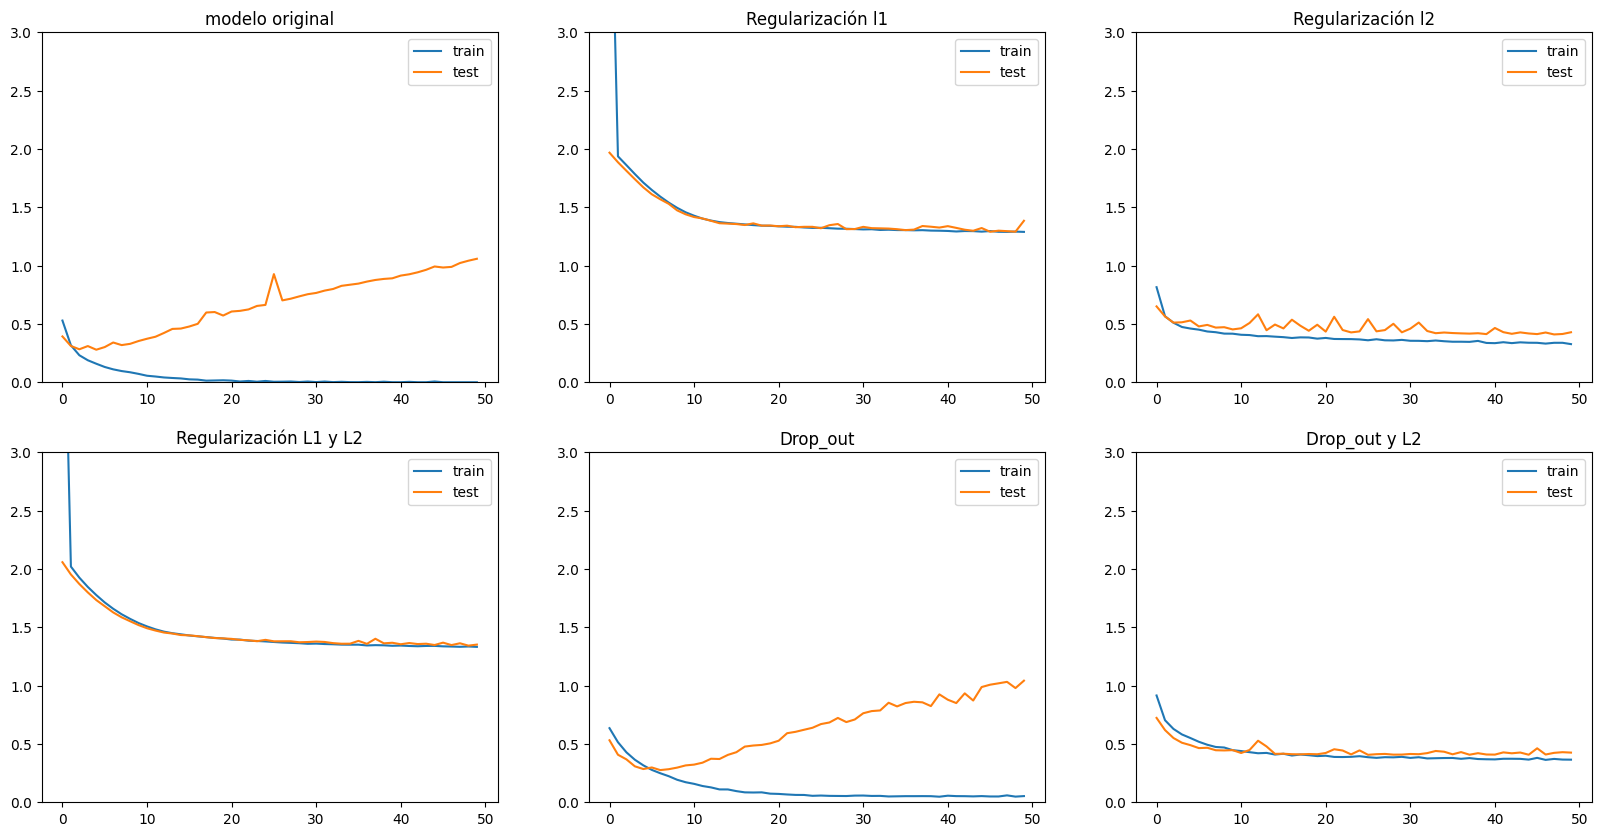

In [ ]:
models = ['modelo original','Regularización l1','Regularización l2','Regularización L1 y L2','Drop_out','Drop_out y L2']
historys =[history,history_l1,history_l2,history_l12,history_Drop,history_DropL2]
y = 0
plt.figure(figsize=(20,10))

for i in historys:
    # Se grafica la función de costo para los conjuntos de entrenamiento y 
    # prueba.
    plt.subplot(2,3,y+1)
    plt.plot(i.history["loss"], label="train")
    plt.plot(i.history["val_loss"], label="test")
    plt.title(models[y])
    plt.ylim(0, 3)
    plt.legend()
    y += 1

plt.show()

# CONCLUSIONES

Con base en las gráficas resultantes se puede concluir que:

1. Las gráficas del modelo original y la del Dropout único presentan un sobre-ajuste, pues a pesar de que los entrenamientos presentan scores superiores al 80% y que las gráficas del training y test tengan un punto mínimo cercano a cero, hay ciertos fallos en los tests los cuales probablemente presenten costos altos.

2. Las demás gráficas, con base a la visualización en dicha escala, se puede apreciar que hay un buen rendimiento en entrenamiento como en test. Sin embargo, para las gráficas de la Regularización L1 y la L1-L2 combinadas hay presencia de Sub-ajuste porque las gráficas se encuentran un poco más desplazadas hacia arriba, lo que significaría que el modelo no fue lo suficientemente robusto para capturar la estructura de los datos de entrenamiento junto con los de prueba, por lo que el rendimiento no es el esperado ni el más óptimo a comparación con las de L2 y Dropout-L2

3. En los modelos de L2 y Dropout-L2 se aprecia un buen rendimiento debido a que las gráficas del entrenamiento y prueba están casi sobrepuestas una de la otra con diferencias significativas mínimas, se puede ver que el punto mínimo de ambas está cercano a cero, es mucho más pequeño que el de las otras a comparación de la del Dropout único que presentan un sobre-ajuste.